### MNIST

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.2956 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.1432 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 2s 1000us/step - loss: 0.1096 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.0898 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.0767 - accuracy: 0.9760
313/313 - 0s - loss: 0.0751 - accuracy: 0.9774


[0.075068399310112, 0.977400004863739]

### Fashion MNIST

In [11]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
# 데이터 탐색
train_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

####  데이터 전처리

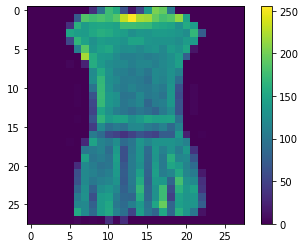

In [20]:
# 데이터 전처리

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
# 0 ~ 1 사이 값으로 스케이링
train_images = train_images / 255.0
test_images = test_images / 255.0

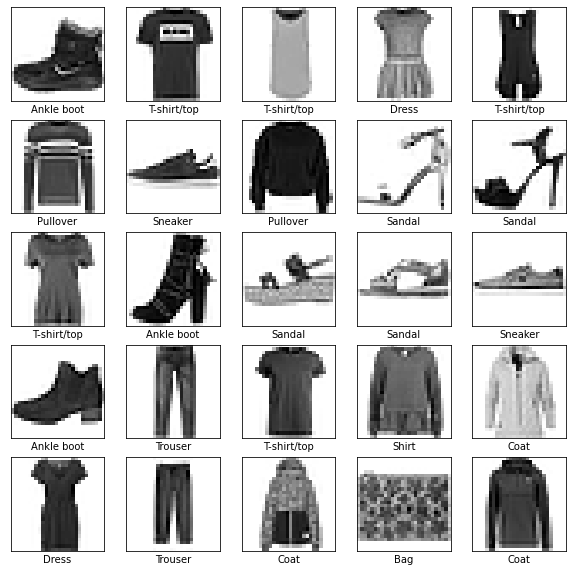

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax') # softmax는 가장 큰값을 1로 너머지는 0으로
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
# 학습
model.fit(train_images, train_labels, epochs=5)

# 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 :',test_acc)

Epoch 1/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.4976 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.3707 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 2s 900us/step - loss: 0.3333 - accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 2s 883us/step - loss: 0.3100 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 2s 893us/step - loss: 0.2923 - accuracy: 0.8919
313/313 - 0s - loss: 0.3537 - accuracy: 0.8748

테스트 정확도 : 0.8748000264167786


In [32]:
# 예측 만들기

predictions = model.predict(test_images)

In [33]:
predictions[0]

array([1.5898988e-07, 1.8102345e-08, 3.5867568e-08, 4.5611134e-08,
       1.4827063e-07, 1.3400932e-02, 1.0931607e-06, 1.3932990e-02,
       7.9249687e-05, 9.7258538e-01], dtype=float32)

In [34]:
np.argmax(predictions[0]) # 예측값

9

In [35]:
test_labels[0] # 실제값

9

In [36]:
# 복사 코드

def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

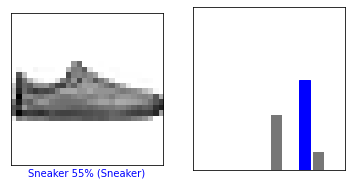

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

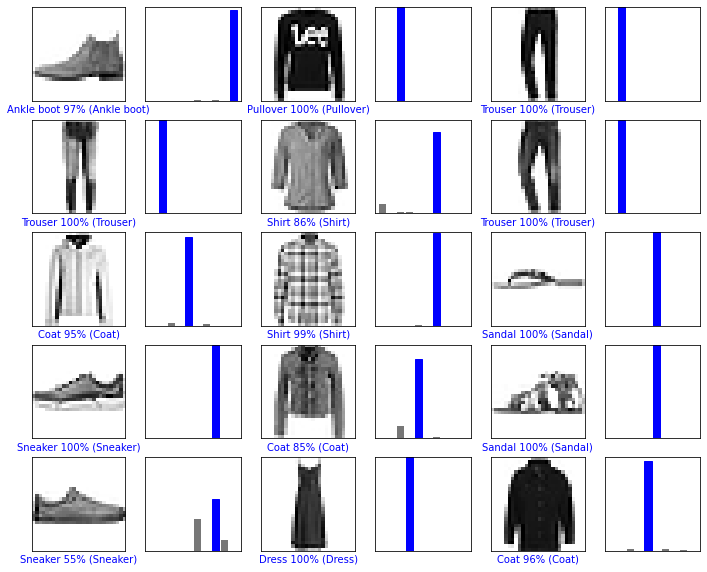

In [39]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### CNN(합성곱 신경망)


---
- Converlutional Layer :  특징을 추출하는 역활
- Pooling Layer : 중요한 정보만 남기고 게산 부담을 줄여주는 역활
- Dropout Layer :  과적합을 방지하는 역활

#### Convolution Neural Network
- Feature Extractor (Convolution, Pooling)
- Classifier (Dense, Dropout)

In [46]:
# 손 글씨

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [47]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

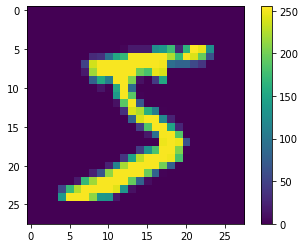

In [49]:
# 그려 보기

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
# reshape을 사용한 이유는 흑백이미지로 만들기 위해서
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.

In [51]:
# 레이어

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1533 - accuracy: 0.9530
Epoch 2/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0464 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0269 - accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0211 - accuracy: 0.9934


In [58]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0439 - accuracy: 0.9857
0.9857000112533569
